# Malaria Cell Identification Using CNN

Malaria Cell data and images are obtained from Dr. Sreenivas Bhattiprolu

In [1]:
import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image
from itertools import product

imgpath = './cell_images/'
SIZE = 64
train_imgs = []
train_labs = []
test_imgs = []
test_labs = []

subpaths = list(product(['test/', 'train/'], ['Parasitized/', 'Uninfected/']))

for k, subpath in enumerate(subpaths):
    path = ''.join(subpath)
    img_names = os.listdir(imgpath + path)
    for i, img_name in enumerate(img_names):
        if img_name.split('.')[1]=='png':
            im = cv2.imread(imgpath + path + img_name)
            im = Image.fromarray(im, 'RGB')
            im = im.resize((SIZE, SIZE))
            if k == 0 or k == 1:
                test_imgs.append(np.array(im))
                if k == 0:
                    test_labs.append(1)
                else:
                    test_labs.append(0)
            else:
                train_imgs.append(np.array(im))
                if k == 2:
                    train_labs.append(1)
                else:
                    train_labs.append(0)

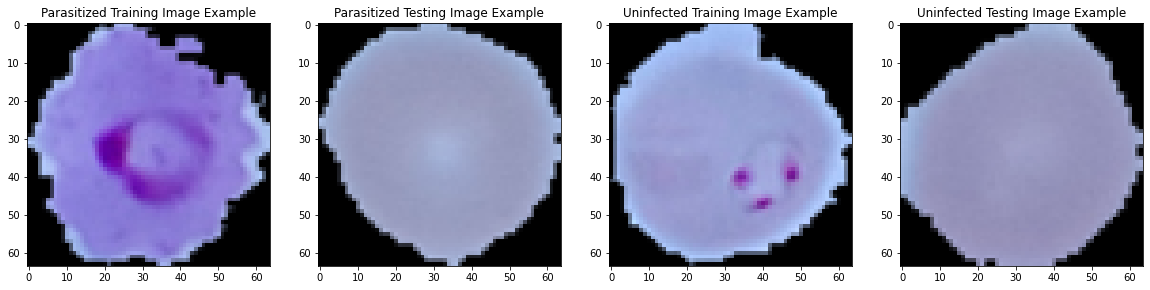

In [2]:
fig, axs = plt.subplots(1, 4, figsize=(20,7))
titles = [' '.join(i) + ' Image Example' for i in product(['Parasitized', 'Uninfected'], ['Training', 'Testing'])]
disp = [train_imgs[0], train_imgs[-1], test_imgs[0], test_imgs[-1]]
for i in range(4):
    axs[i].set_title(titles[i])
    axs[i].imshow(disp[i])

We have loaded in 20 training images (10 parasitized & 10 uninfected) and 20 testing images (10 parasitized & uninfected).

Visuals are generated above.

In [5]:
from cnn import create_model

model = create_model(SIZE)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               1677

In [9]:
from tensorflow.keras.utils import to_categorical

X_train = np.array(train_imgs)
y_train = to_categorical(np.array(train_labs))
X_test = np.array(test_imgs)
y_test = to_categorical(np.array(test_labs))

In [11]:
history = model.fit(X_train,
                    y_train,
                    batch_size = 64,
                    verbose=1,
                    epochs=5,
                    validation_split=0.1,
                    shuffle=False)

Epoch 1/5
1/1 [==============================] - 13s 13s/step - loss: 1.2543 - accuracy: 0.4444 - val_loss: 8.8025 - val_accuracy: 0.5000
Epoch 2/5
1/1 [==============================] - 0s 119ms/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 3/5
1/1 [==============================] - 0s 153ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/5
1/1 [==============================] - 0s 161ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/5
1/1 [==============================] - 0s 159ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


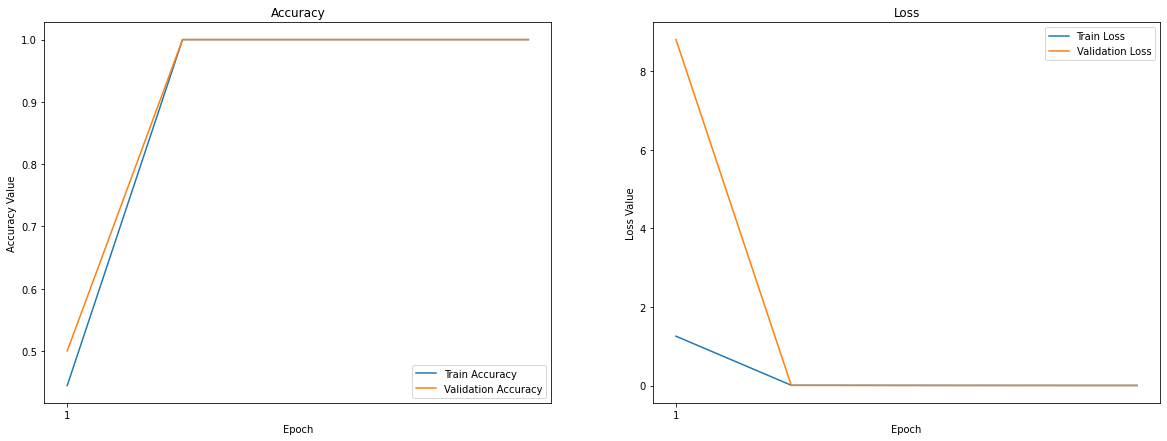

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,7))
max_epoch = len(history.history['accuracy'])+1
epoch_list = list(range(1,max_epoch))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [27]:
preds = model.predict(X_test)
y_hat = [p.argmax() for p in preds]
y_hat_conf = [preds[i][y_hat[i]] for i in range(len(y_hat))]

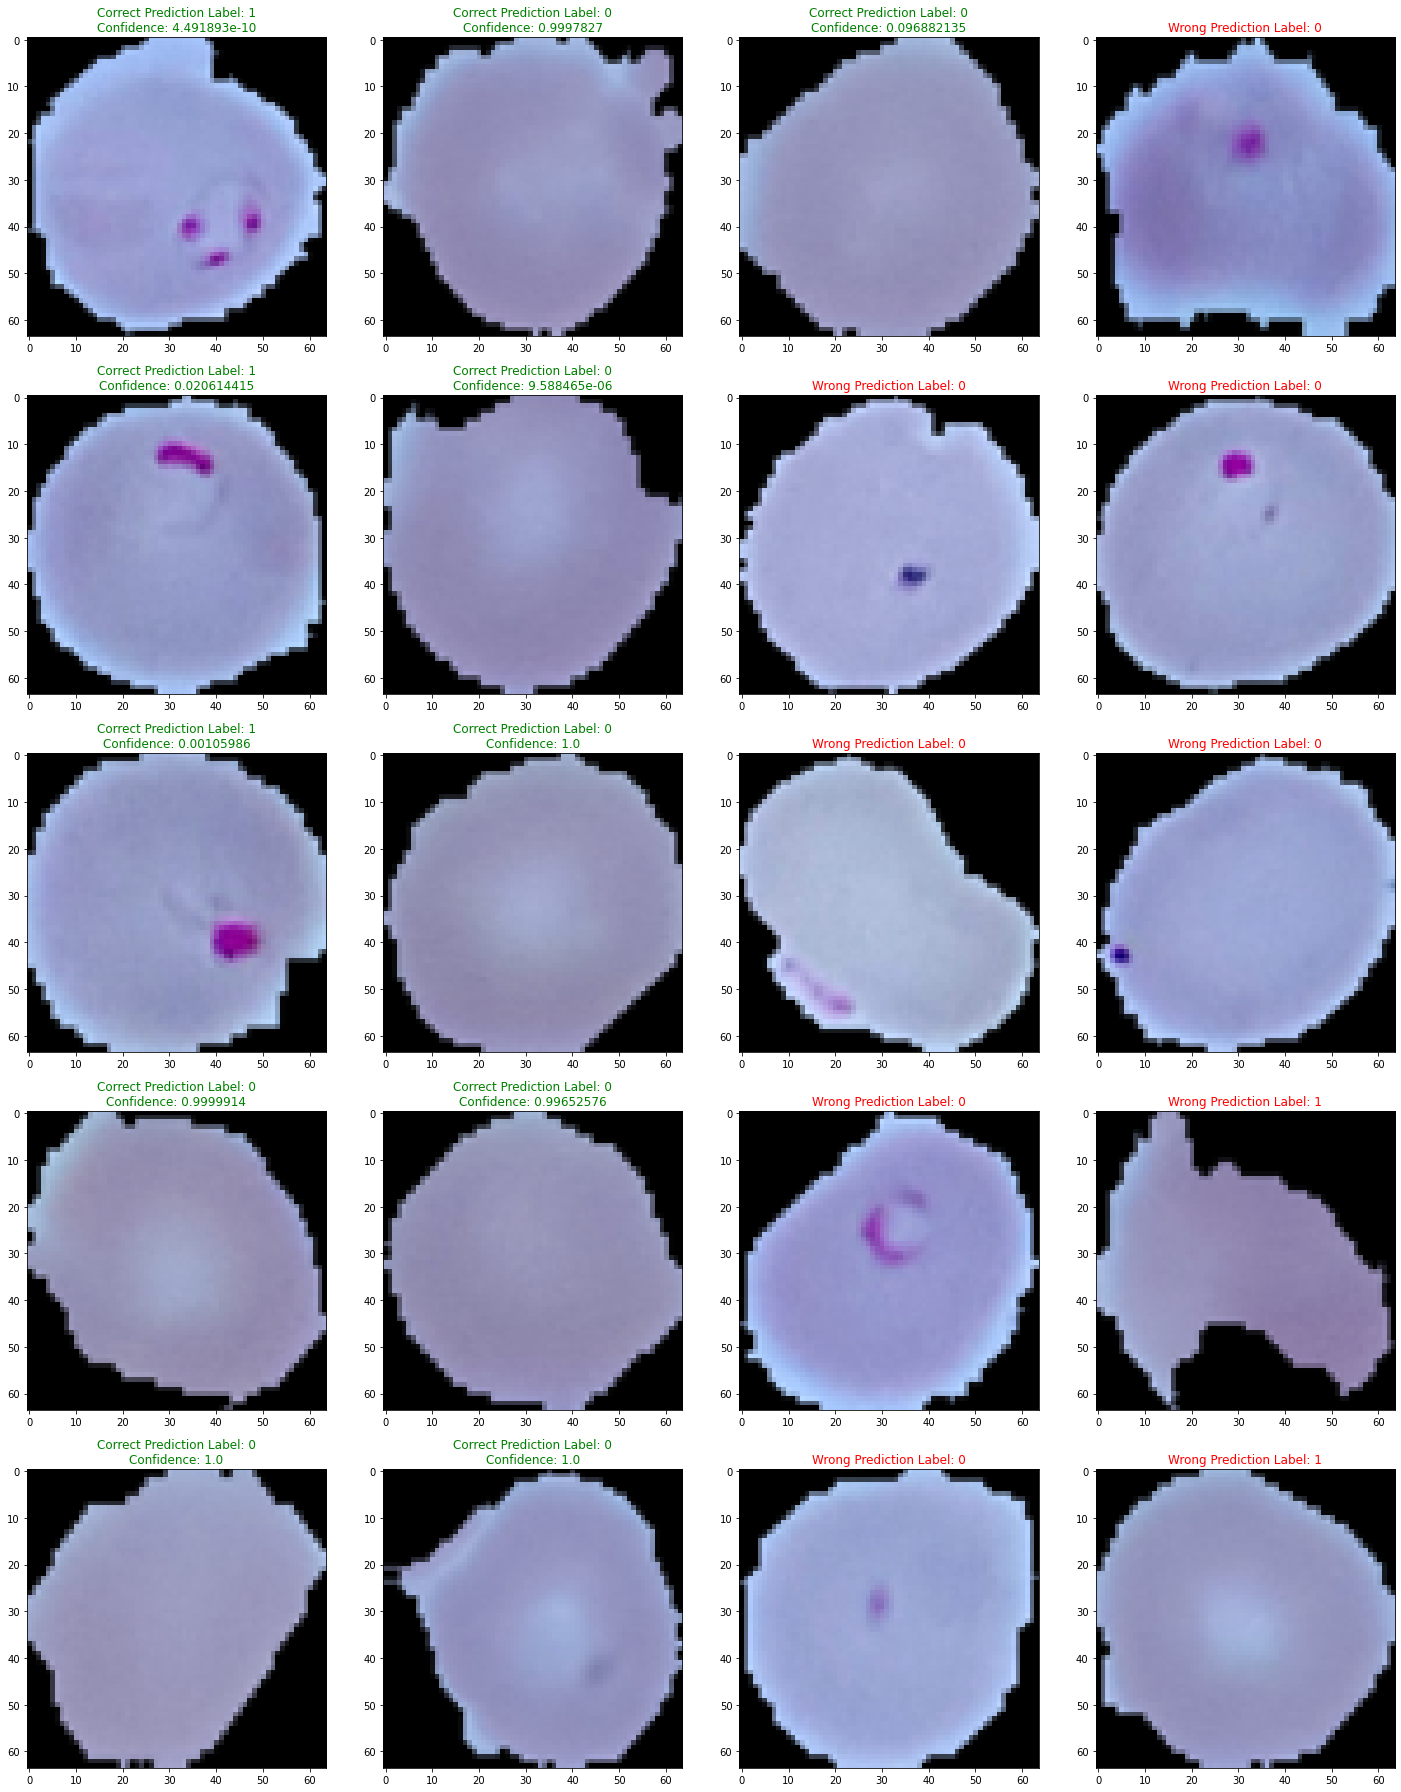

In [58]:
fig, axs = plt.subplots(5, 4, figsize=(20,25))
k = 0
for i in range(len(y_hat)):    
    if y_hat[i]==test_labs[i]:        
        ax = axs[k%5][k//5]
        ax.set_title("Correct Prediction Label: " + str(y_hat[i]) + "\nConfidence: " + str(y_hat_conf[i]), color = 'green')
        ax.imshow(test_imgs[i])
        k += 1
        
for i in range(len(y_hat)):    
    if y_hat[i]!=test_labs[i]:
        ax = axs[k%5][k//5]
        ax.set_title("Wrong Prediction Label: " + str(y_hat[i]), color = 'red')
        ax.imshow(test_imgs[i])
        k += 1

plt.tight_layout()